#**Lab Programming Machine Learning**

##Exercise Sheet 1

###Exercise 1: PythonWarmup

#### Part A

In [1]:
#Uploading the file from local file system
from google.colab import files
uploaded = files.upload()

Saving random_text.txt to random_text.txt


In [2]:
f = open("random_text.txt")
text = f.read()
lst = text.replace(",","").replace(".","").lower().split(" ")
print(lst)

['lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'donec', 'in', 'erat', 'maximus', 'eleifend', 'ante', 'eget', 'feugiat', 'libero', 'maecenas', 'vel', 'pharetra', 'orci', 'morbi', 'vitae', 'finibus', 'augue', 'nunc', 'pharetra', 'ac', 'lacus', 'vel', 'efficitur', 'cras', 'sed', 'urna', 'non', 'ex', 'luctus', 'imperdiet', 'sed', 'eu', 'volutpat', 'nunc', 'maecenas', 'et', 'nunc', 'tellus', 'nunc', 'eget', 'purus', 'consectetur', 'ultricies', 'leo', 'iaculis', 'gravida', 'elit', 'nunc', 'molestie', 'tortor', 'dolor', 'nec', 'laoreet', 'lectus', 'sollicitudin', 'sed', 'duis', 'ultricies', 'at', 'diam', 'nec', 'tincidunt', 'donec', 'at', 'metus', 'placerat', 'lacus', 'commodo', 'molestie', 'nec', 'ut', 'risus', 'curabitur', 'fermentum', 'justo', 'lectus', 'non', 'maximus', 'mauris', 'placerat', 'vel', 'fusce', 'auctor', 'ex', 'massa', 'nec', 'condimentum', 'enim', 'interdum', 'nec', 'maecenas', 'consectetur', 'varius', 'nunc', 'auctor', 'pellentesque', 'mi', 

Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc. Search engines and other enterprise indexing platforms often filter the stop words while fetching results from the database against the user queries.

In [3]:
#Using library nlkt to get a list of stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list_w_sw = [word for word in lst if not word in stopwords.words()]
print(list_w_sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['lorem', 'ipsum', 'dolor', 'amet', 'consectetur', 'adipiscing', 'elit', 'donec', 'erat', 'maximus', 'eleifend', 'eget', 'feugiat', 'libero', 'maecenas', 'vel', 'pharetra', 'orci', 'morbi', 'vitae', 'finibus', 'augue', 'nunc', 'pharetra', 'ac', 'lacus', 'vel', 'efficitur', 'cras', 'sed', 'urna', 'ex', 'luctus', 'imperdiet', 'sed', 'volutpat', 'nunc', 'maecenas', 'nunc', 'tellus', 'nunc', 'eget', 'purus', 'consectetur', 'ultricies', 'leo', 'iaculis', 'gravida', 'elit', 'nunc', 'molestie', 'tortor', 'dolor', 'nec', 'laoreet', 'lectus', 'sollicitudin', 'sed', 'duis', 'ultricies', 'diam', 'nec', 'tincidunt', 'donec', 'metus', 'placerat', 'lacus', 'commodo', 'molestie', 'nec', 'risus', 'curabitur', 'fermentum', 'justo', 'lectus', 'maximus', 'mauris', 'placerat', 'vel', 'fusce', 'auctor', 'ex', 'massa', 'nec', 'condimentum', 'interdum', 'nec', 'maecenas', 'consectetur', 'varius', 'n

In [5]:
#function for the purpose of sorting words_f
def myFunc(e): 
  return e[1]

#Word counter
words = [] #to store unique words
words_f = [] #to store lists of words and their frequency
for word in list_w_sw:
  if not word in words:
    i = 0
    for x in list_w_sw:
      if x == word:
        i = i + 1
    words.append(word)
    words_f.append([word,i])
#Sorting words_f by frequency
words_f.sort(reverse=True, key=myFunc)

#Number of unique words
uniques = len(words)
print(uniques)

#Top five frequent words
most_common = words_f[:5]
print(most_common)

139
[['sed', 12], ['amet', 8], ['elit', 8], ['donec', 7], ['eget', 6]]


Answer:

There are 139 non stop unique words

The top 5 more frequent non-stop words are: amet, elit, sed, Donec, eget

####Part B: Numpy

In [ ]:
#Uploading the file from local file system
from google.colab import files
uploaded = files.upload()

Saving lena_gray.jpg to lena_gray.jpg


In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

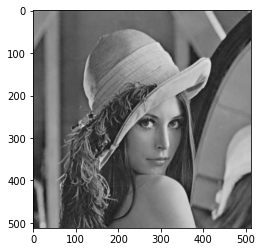

In [ ]:
#Visualizing the image
img = mpimg.imread('lena_gray.jpg')
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

In [ ]:
#Function to blur an image
def blur(img):
  #Padding the original image to avoid reduction of the size
  img_pad = np.ones((img.shape[0]+2,img.shape[1]+2),dtype=int)
  img_pad[1:-1,1:-1] = img
  #Kernel
  kernel = 1/9 * np.ones((3,3),dtype=int)
  #New black image to use as a canvas
  new_img = np.zeros(img.shape,dtype=int)
  #Populating the new values on the canvas
  for i in range(1,img.shape[0]+1):
    for j in range(1,img.shape[1]+1):
      slide = img_pad[i-1:i+2,j-1:j+2]
      new = np.sum(np.multiply(kernel,slide))
      new_img[i-1][j-1]= new
  return new_img

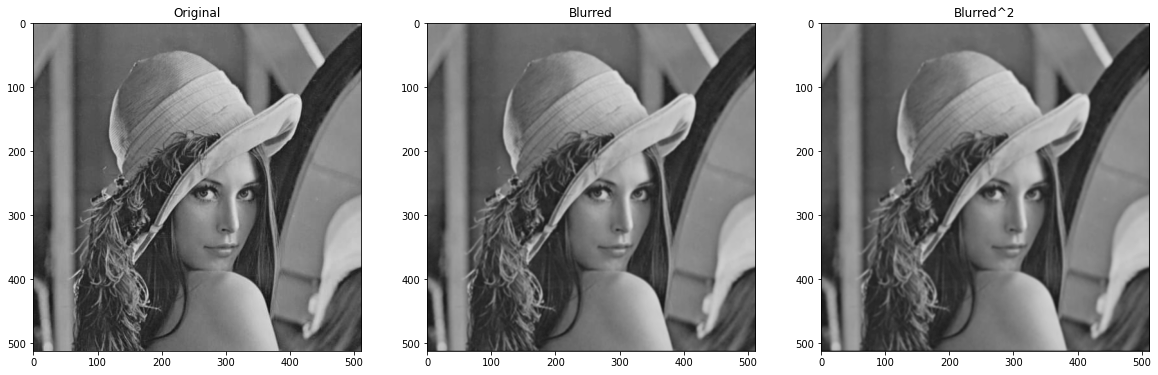

In [ ]:
#Plot of the original image and blurred ones
plt.figure(figsize=(20,10))
#Original image
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
#Blurred image from the original image
img1 = blur(img)
plt.subplot(1, 3, 2)
plt.title("Blurred")
plt.imshow(img1,cmap='gray',vmin=0,vmax=255)
#Blurred image from the previous blurred image
img2 = blur(img1)
plt.subplot(1, 3, 3)
plt.title("Blurred^2")
plt.imshow(img2,cmap='gray',vmin=0,vmax=255)

###Exercise 2: Linear Regression through exact form

Multiple Linear Regression (MLR)
\begin{align}
y_i=\beta_0 + \sum_{j=1}^M \beta_j x_{ij} + \epsilon_i
\end{align}
Where M is the number of independent variables

With M=2
\begin{align}
y_i=\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_i
\end{align}
As a matrix with N samples
\begin{align}
\begin{pmatrix}
y_1 \cr
y_2 \cr
\vdots \cr
y_N
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} & x_{12} \cr
1 & x_{21} & x_{22} \cr
\vdots & \vdots & \vdots \cr
1 & x_{N1} & x_{N2}
\end{pmatrix}
\begin{pmatrix}
\beta_0 \cr
\beta_1 \cr
\beta_2
\end{pmatrix}
+
\begin{pmatrix}
\epsilon_1 \cr
\epsilon_2 \cr
\vdots \cr
\epsilon_N
\end{pmatrix}
\end{align}

With M = 1 (Simple linear regression)
\begin{align}
y_i=\beta_0 + \beta_1 x_{i1} + \epsilon_i
\end{align}
As a matrix with N samples
\begin{gather}
\begin{pmatrix}
y_1 \cr
y_2 \cr
\vdots \cr
y_N
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} \cr
1 & x_{21} \cr
\vdots & \vdots \cr
1 & x_{N1}
\end{pmatrix}
\begin{pmatrix}
\beta_0 \cr
\beta_1
\end{pmatrix}
+
\begin{pmatrix}
\epsilon_1 \cr
\epsilon_2 \cr
\vdots \cr
\epsilon_N
\end{pmatrix}
\end{gather}
Matritial representation
\begin{align}
Y=X\beta + \epsilon
\end{align}
\begin{align}
\hat Y = X \hat\beta
\end{align}
\begin{align}
\hat\beta = {(\underbrace{X^TX}_{A})}^{-1} X^T \hat Y
\end{align}
For this exercise we will considerate the case of just one independant variable (M=1)

In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

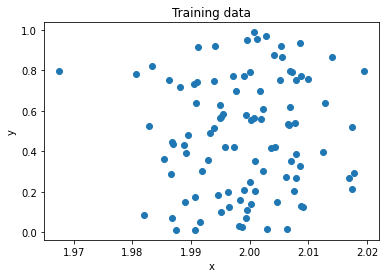

In [ ]:

U = np.random.normal(loc=2, scale=0.01, size=(100,1))
Y = np.random.uniform(size=(100,1))
plt.title("Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(U,Y)

In [ ]:
#Subroutine to invert a square matrix A. Based on Gauss–Jordan elimination method
def invt(mtx):
  n = mtx.shape[0]
  mtx_I = np.identity(n,dtype=float)
  for d in range(n):
    #row/dig
    dig = mtx[d,d]
    for j in range(n):
      mtx[d,j] = mtx[d,j]/dig
      mtx_I[d,j] = mtx_I[d,j]/dig
    for i in range(n):
      if i != d:
        #row-mul*row(dig)
        mult = mtx[i,d]
        for j in range(n):
          mtx[i,j] = mtx[i,j]-mult*mtx[d,j]
          mtx_I[i,j]= mtx_I[i,j]-mult*mtx_I[d,j]
  return mtx_I

In [ ]:
X = np.concatenate((np.ones((100,1)),U),axis=1)
A = np.matmul(X.transpose(),X)
beta = np.matmul(np.matmul(invt(A.copy()),X.transpose()),Y)
print(beta)

[[-2.218698  ]
 [ 1.34869273]]


Now we draw linear predictor function:
$\hat y = \hat\beta_0 + \hat\beta_1 x$

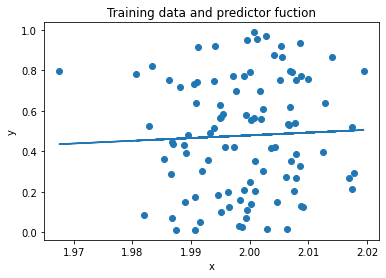

In [ ]:
def f(x):
  return beta[0,0] + beta[1,0] * x
ylist = f(U)
plt.plot(U,ylist)
plt.title("Training data and predictor fuction")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(U,Y)

Compearing inverse fuction with numpy.linalg utility

In [ ]:
from numpy.linalg import inv
print(A)
print(invt(A.copy()))
print(inv(A))


[[100.         199.91121907]
 [199.91121907 399.65359497]]
[[ 462.5696874  -231.38255549]
 [-231.38255549  115.74265645]]
[[ 462.5696874  -231.38255549]
 [-231.38255549  115.74265644]]
